In [6]:
%pip install pandas

  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------- ----------------- 6.6/11.5 MB 30.9 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 28.3 MB/s eta 0:00:00
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.datasets import load_iris
import pandas as pd

In [8]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [9]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [11]:
print(y.value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


In [12]:
print(X.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(iris.target)  

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2,     # 80% train, 20% test
    stratify=y_encoded, 
    random_state=42
)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Naïve Bayes Classifier

In [16]:
#  Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [18]:
# Performk-cross-validation on datasets for evaluation
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.91666667 0.95833333 1.         0.95833333 0.95833333]


In [19]:
%pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
#Accuracy, TP, TN, FP, TN, error, Recall, Specificity, F1-score, AUC for classification models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

In [23]:
# Fit the model
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

#Accuracy, TP, TN, FP, TN, error, Recall, Specificity, F1-score, AUC for classification models
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [25]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Mean Squared Error: 2900.1936284934827
R^2 Score: 0.45260276297191926


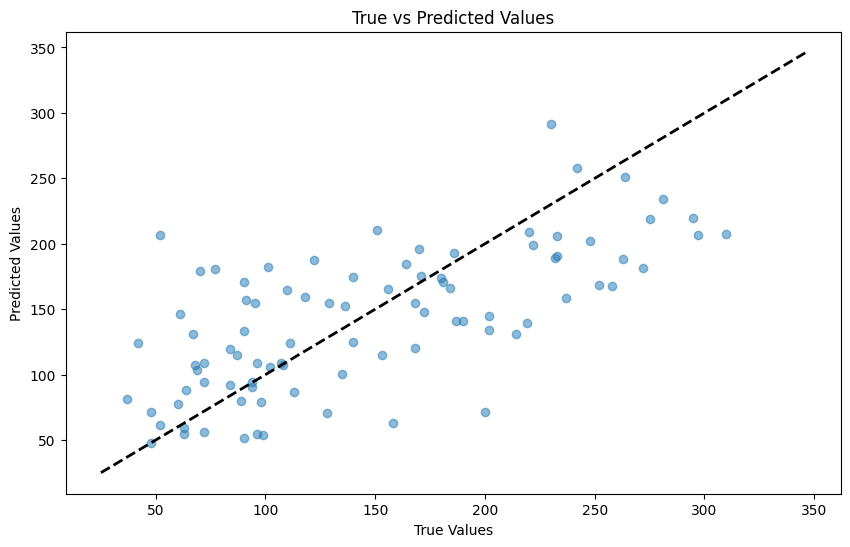

In [28]:
# Simple Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='diabetes_progression')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 80% train, 20% test
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


Mean Squared Error: 105.59038226382692
R^2 Score: 0.9365814213479908


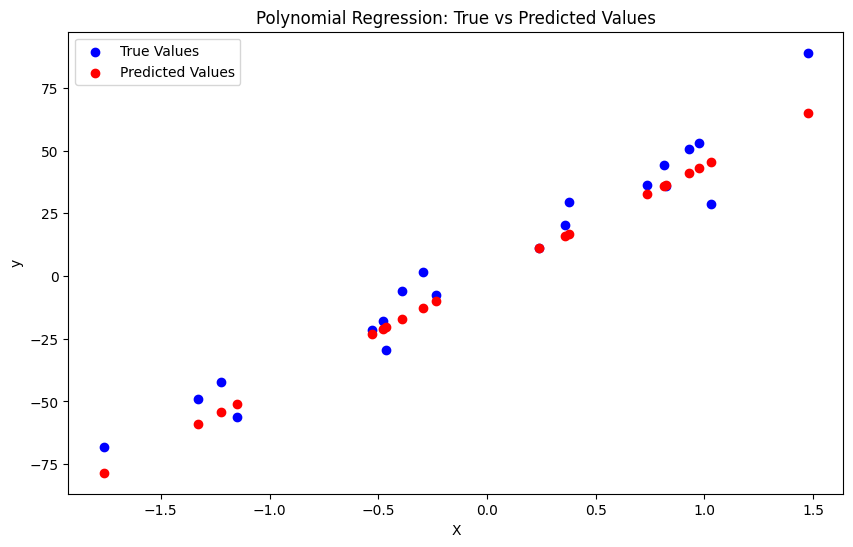

In [31]:
#  Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = X.flatten()  # Flatten the array for easier plotting
y = y.flatten()  # Flatten the array for easier plotting

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(-1, 1), y, 
    test_size=0.2,     # 80% train, 20% test
    random_state=42
)

# Create a polynomial regression model
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.title('Polynomial Regression: True vs Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()



Mean Squared Error: 2892.0145657501726
R^2 Score: 0.45414652070698225


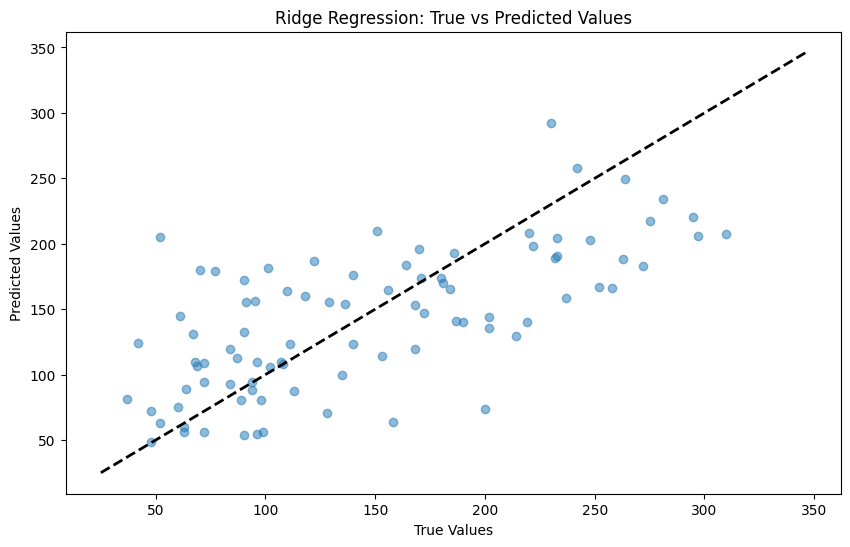

Mean Squared Error: 2884.6242887352123
R^2 Score: 0.45554139902790414


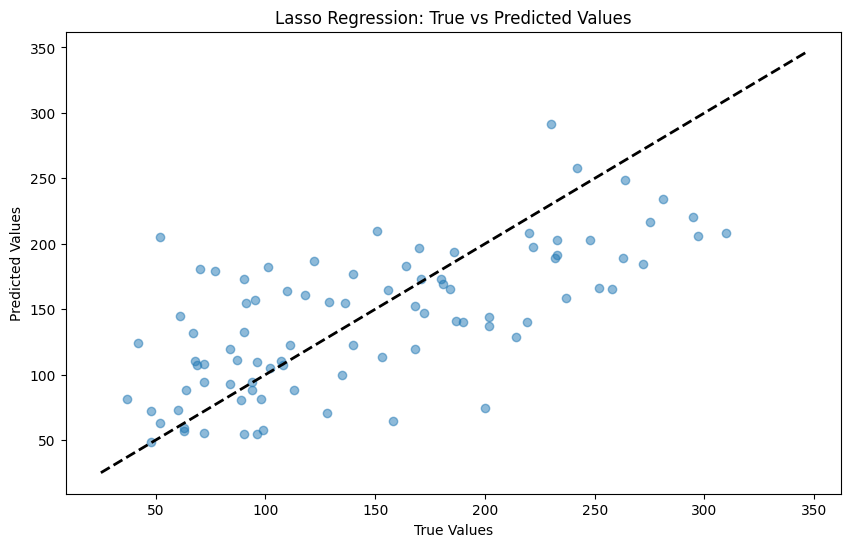

In [33]:
#  Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='diabetes_progression')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 80% train, 20% test
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: True vs Predicted Values')
plt.show()

#  Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # Regularization strength
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: True vs Predicted Values')
plt.show()


In [35]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 80% train, 20% test
    stratify=y, 
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

